<a href="https://colab.research.google.com/github/ashritakodali/knn/blob/main/FINAL_assignment_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [14]:
! git clone https://github.com/DS3001/knn

fatal: destination path 'knn' already exists and is not an empty directory.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [16]:
# part 1: loading in data
df_cars = pd.read_csv("./knn/data/USA_cars_datasets.csv")
cars = df_cars[["price", "year", "mileage"]]
print(cars.shape)
print("The number of NAs in the price column is", sum(cars["price"].isna()))
print("The number of NAs in the year column is", sum(cars["year"].isna()))
print("The number of NAs in the mileage column is", sum(cars["mileage"].isna()))
print(cars.head())


(2499, 3)
The number of NAs in the price column is 0
The number of NAs in the year column is 0
The number of NAs in the mileage column is 0
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654


In [17]:
# part 2: maxmin normalize
def maxmin(x):
  norm = (x-min(x))/(max(x)-min(x))
  return(norm)

cars["year_minmax"] = maxmin(cars["year"])
cars["mileage_minmax"] = maxmin(cars["mileage"])
print(cars.head())

   price  year  mileage  year_minmax  mileage_minmax
0   6300  2008   274117     0.744681        0.269287
1   2899  2011   190552     0.808511        0.187194
2   5350  2018    39590     0.957447        0.038892
3  25000  2014    64146     0.872340        0.063016
4  27700  2018     6654     0.957447        0.006537


<ipython-input-17-ad2c150578eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["year_minmax"] = maxmin(cars["year"])
<ipython-input-17-ad2c150578eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["mileage_minmax"] = maxmin(cars["mileage"])


In [18]:
# part 3: split sampling
from sklearn.model_selection import train_test_split

y = cars["price"]
X = cars.loc[:, ["year_minmax", "mileage_minmax"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 100)

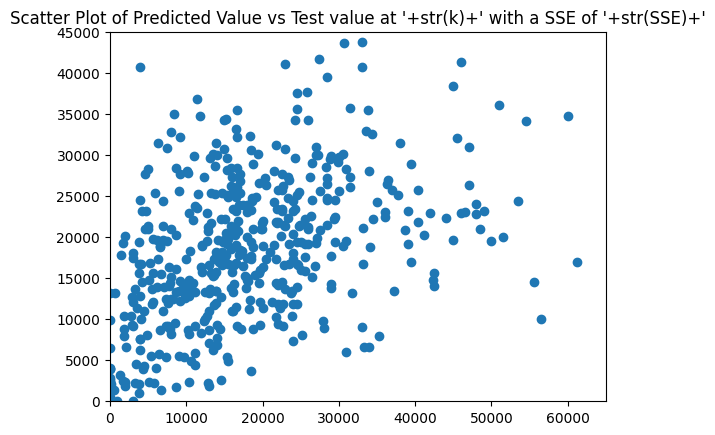

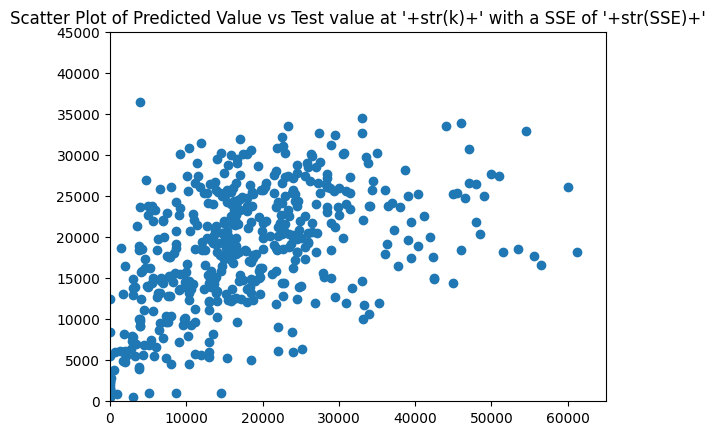

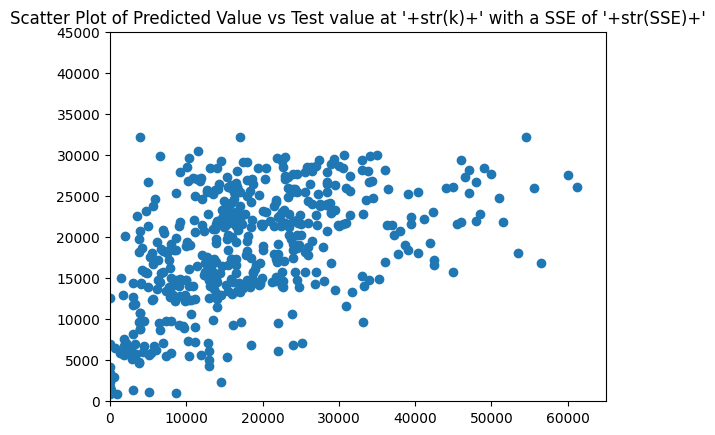

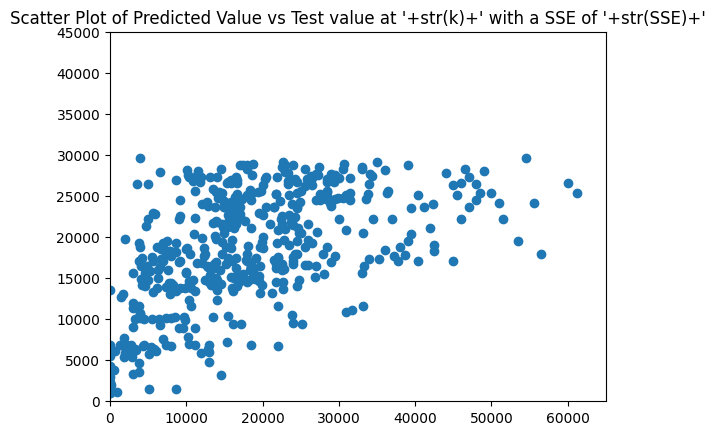

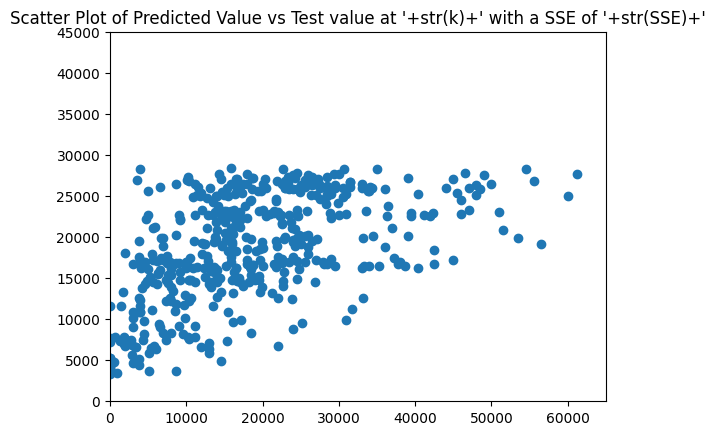

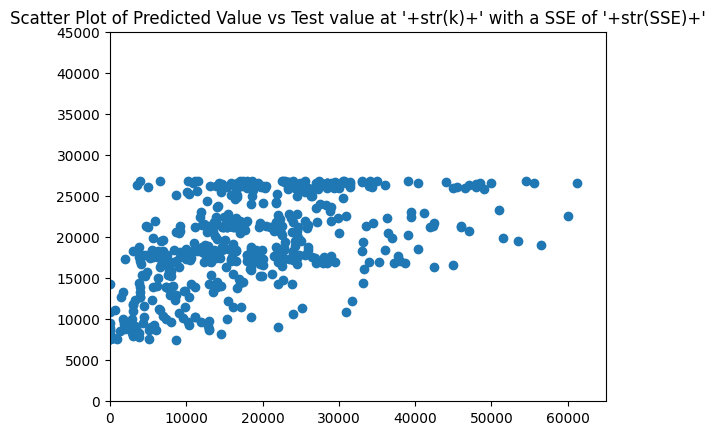

In [34]:
# part 4: kNN algorithm
from sklearn.neighbors import KNeighborsRegressor
k_bar_list = [3, 10, 25, 50, 100, 300]
SSE = np.zeros(len(k_bar_list))
SSE_on_train = np.zeros(len(k_bar_list))

for k in k_bar_list:
    model = KNeighborsRegressor(n_neighbors=k)
    fitted_model = model.fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test, y_hat)
    plt.title("Scatter Plot of Predicted Value vs Test value at '+str(k)+' with a SSE of '+str(SSE)+'")
    axes.set_ylim(0, 45000)
    axes.set_xlim(0, 65000)
    plt.show()



The optimal k value is [77]


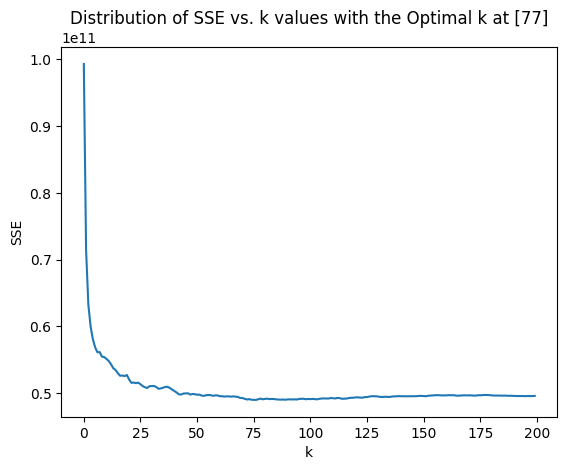

48994016250.75729


In [47]:
# part 5: optimal k
k_bar = 200
k_grid = np.arange(1, k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
  fitted_model = KNeighborsRegressor(n_neighbors=k+1)
  model = fitted_model.fit(X_train, y_train)
  y_hat = model.predict(X_test)
  SSE[k] = np.sum((y_test - y_hat)**2)

SSE_minimum = np.min(SSE)
minimum_SSE_index = np.where(SSE == SSE_minimum)
k_star = k_grid[minimum_SSE_index]
print("The optimal k value is", k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("Distribution of SSE vs. k values with the Optimal k at "+str(k_star))
plt.ylabel("SSE")
plt.show()

print(SSE_minimum)

1. There are no NA's to handle. The dimension of the data is 2499 rows by 3 columns.
4. It seems that as the k value increases to a certain point, the sse continues to be minimized. However, once that point has been reached, it no longer is minimized and fluctuates near that optimum value but is slighly above said value. On the scatter plot, the data points are less random and appear to cluster around the same number as the k value increases.
5. The optimal k value for these data is 77.
6. Since the optimal k value is 77, when we are below the optimum k value, as was the case for k = 3, 10, and 25, we were underfitting the model, indicating that our model has the sufficient parameters but lacks the data. However, once you go above the optimal value of 77, so when k equaled 300, we will be overfitting the model, meaning our model is too complex in relation to the amount of data we have to train said model. However, when we are close to the optimal value of 77, as was the case when k equaled 50 or 100, the model does not over fit or underfit. Looking at the scatter plots, the smaller your k value was, the greater the variance of your prediction, meaning that your confidence intervals would have larger ranges than that of the predictions made using higher k intervals.


**Q2.** This question is a case study for $k$ nearest neighbor. The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

In [52]:
df = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')
print(df.describe())
print(df.shape)
df = df.drop("time", axis = 1)

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [53]:
# part 2: correlation matrix
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [54]:
print(df.loc[:,["anaemia",'DEATH_EVENT']].groupby("anaemia").describe())
print(df.loc[:,["diabetes",'DEATH_EVENT']].groupby("diabetes").describe())
print(df.loc[:,["high_blood_pressure",'DEATH_EVENT']].groupby("high_blood_pressure").describe())
print(df.loc[:,["sex",'DEATH_EVENT']].groupby("sex").describe())
print(df.loc[:,["smoking",'DEATH_EVENT']].groupby("smoking").describe())

        DEATH_EVENT                                             
              count      mean       std  min  25%  50%  75%  max
anaemia                                                         
0             170.0  0.294118  0.456991  0.0  0.0  0.0  1.0  1.0
1             129.0  0.356589  0.480859  0.0  0.0  0.0  1.0  1.0
         DEATH_EVENT                                             
               count      mean       std  min  25%  50%  75%  max
diabetes                                                         
0              174.0  0.321839  0.468530  0.0  0.0  0.0  1.0  1.0
1              125.0  0.320000  0.468353  0.0  0.0  0.0  1.0  1.0
                    DEATH_EVENT                                             
                          count      mean       std  min  25%  50%  75%  max
high_blood_pressure                                                         
0                         194.0  0.293814  0.456687  0.0  0.0  0.0  1.0  1.0
1                         105.0  0.37

In [63]:
# part 4: building X, y matrix
y = df['DEATH_EVENT']
X = df.loc[:,['age','ejection_fraction','serum_creatinine','high_blood_pressure','anaemia']]

In [64]:
# part 5: maxmin normalize
X = X.apply(maxmin)

In [65]:
# part 6: split sample
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 625)

[12]


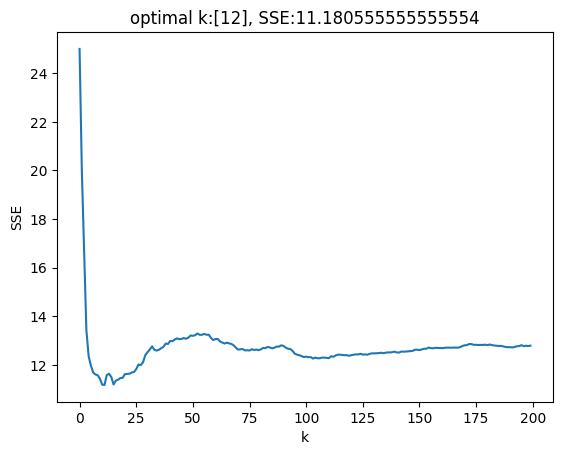

In [66]:
# part 7: determine the optimal k:
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()

[25]


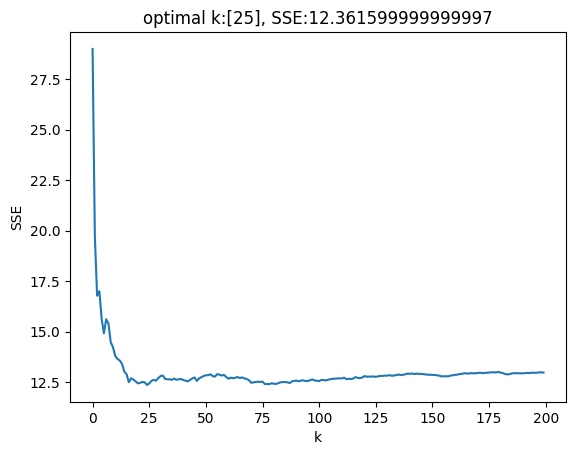

In [67]:
# part 8:
df2 = pd.read_csv('./knn/data/heart_failure_clinical_records_dataset.csv')
df2 = df2.drop("time", axis = 1)
y = df2["DEATH_EVENT"]
X = df2.drop("DEATH_EVENT", axis = 1)
X = X.apply(maxmin)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state = 625)
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    knn = KNeighborsRegressor(n_neighbors=k+1)
    predictor = knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star)+', SSE:'+str(SSE_min))
plt.ylabel('SSE')
plt.show()


1. There are no NAs to handle.
2. The variables that are strongly associated with a death event include the variable age, the variable ejection fraction, and the variable serum creatine.
3. The categorical variables that result in a higher proportion of the populationg dying when the variable takes the value of 1 rather than 0 are the variable anaemia and the variable high blood pressure.
7. The optimal number of neighbors is 12.
8. The model with fewer variables is the better model as it has a lower sse value. The model with all the variables requires more neighbors, indicating that the model with a fewer neighbors is better as it is more of an achievable goal to obtain the data itself and does a better job at predicting due to the smaller sse value.
